In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# modeling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings

In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X = df.drop(columns=['math_score'], axis=1)

In [4]:
y = df['math_score']

In [7]:
# create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude=['object']).columns
cat_features = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [12]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [13]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=False),
    'AdaBoost': AdaBoostClassifier(),
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate(y_train, y_train_pred)
    
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance on Train Data")
    print("MAE: ", model_train_mae)
    print("MSE: ", model_train_mse)
    print("RMSE: ", model_train_rmse)
    print("R2: ", model_train_r2)
    
    print("-----------------------")
    
    print("Model Performance on Test Data")
    print("MAE: ", model_test_mae)
    print("MSE: ", model_test_mse)
    print("RMSE: ", model_test_rmse)
    print("R2: ", model_test_r2)
    
    r2_list.append(model_test_r2)
    print("=======================")
    print("\n")

Linear Regression
Model Performance on Train Data
MAE:  4.26708984375
MSE:  28.34850036621094
RMSE:  5.32433097827426
R2:  0.8742567465397689
-----------------------
Model Performance on Test Data
MAE:  4.2158203125
MSE:  29.116678771972655
RMSE:  5.3959872842671395
R2:  0.8803449074540941


Lasso
Model Performance on Train Data
MAE:  5.206302661246526
MSE:  43.47840400585579
RMSE:  6.593815587795566
R2:  0.8071462015863456
-----------------------
Model Performance on Test Data
MAE:  5.157881810347763
MSE:  42.5064168384116
RMSE:  6.519694535667419
R2:  0.8253197323627853


Ridge
Model Performance on Train Data
MAE:  4.264987823725981
MSE:  28.33778823308244
RMSE:  5.323324922741654
R2:  0.8743042615212909
-----------------------
Model Performance on Test Data
MAE:  4.211100688014261
MSE:  29.056272192348306
RMSE:  5.39038701693564
R2:  0.8805931485028737


K-Neighbors Regressor
Model Performance on Train Data
MAE:  4.516749999999999
MSE:  32.57765
RMSE:  5.707683417990174
R2:  0.85549

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,CatBoost,0.851632
5,Random Forest,0.851575
6,XGBoost,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.731403
8,AdaBoost,0.213749


In [15]:
# linear regression
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of Linear Regression: ", score)

Accuracy of Linear Regression:  88.03449074540941


Text(0, 0.5, 'Predictions')

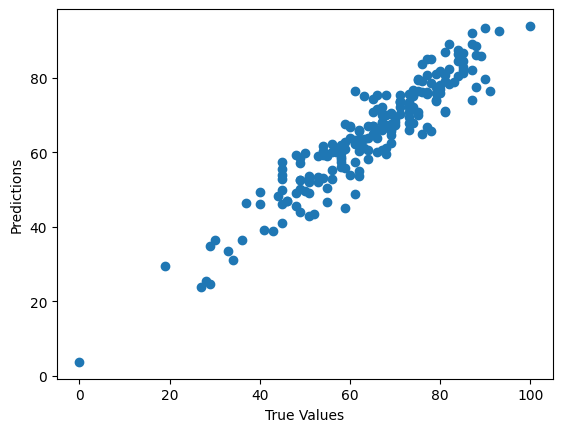

In [16]:
# plot
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

<Axes: xlabel='math_score'>

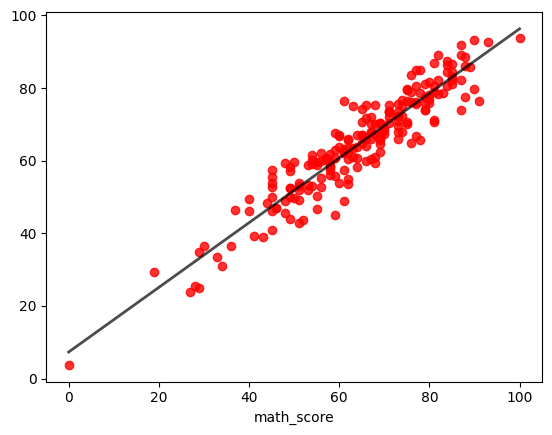

In [17]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red', line_kws={"color": "black", "alpha": 0.7, "lw": 2})

In [19]:
# difference between true and predicted values
pred_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred, 'Difference': y_test - y_pred})
pred_df

,True Values,Predicted Values,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
